In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = os.path.abspath('.\\kaggle_givemesomecredit_train.csv')

In [3]:
df = pd.read_csv(path)
df = df.dropna(axis=0)

In [4]:
df = df.drop('id', axis = 1)

List of all the variables in the training dataset:

Dependent variable:
- output

Independent (10) variables:
- age
- 1monplus_dlqin_freq (30-59 days)
- 2monplus_dlqin_freq (60-89 days)
- 3monplus_dlqin_freq (90 days or more)
- credit_balance_ratio
- debt_ratio
- income
- num_credit_lines
- num_realestate_loans
- num_dependents
- expense

Total number of rows: 120269

In [5]:
col = ['age', 'credit_balance_ratio', 'debt_ratio', 'income', 'num_credit_lines', 'num_realestate_loans', 'dependents']
#col = list(df.columns)

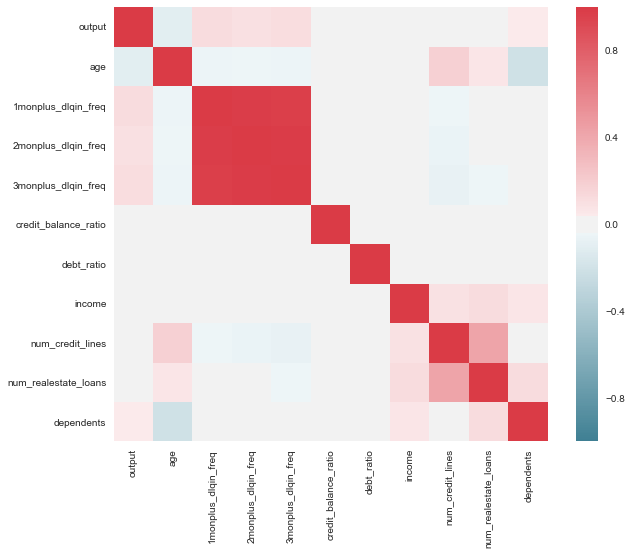

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

It can be seen from the above correlation plot that output is negatively correlated with age; it is positively correlated with one, two, and three month delinquency frequencies and number of dependents.

In [7]:
def limits(mean, std_deviation):
    lower = mean-2*std_deviation
    upper = mean+2*std_deviation
    return lower, upper

In [8]:
def hard_limits(mean, std_deviation):
    lower = mean-std_deviation
    upper = mean+std_deviation
    return lower, upper

In [9]:
for i in col:
    m = df[i].describe()['mean']
    std = df[i].describe()['std']
    l, u = limits(m, std)
    df = df[(df[i] > l) &  (df[i] < u)]

In [10]:
len(df)

104913

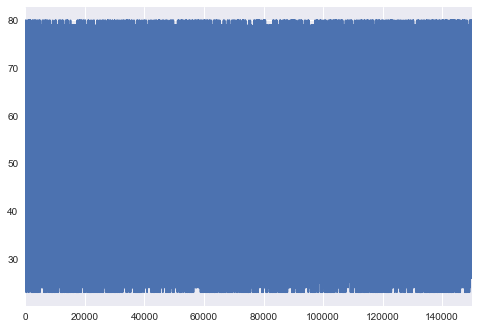

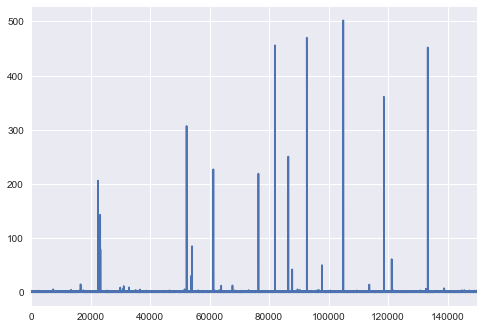

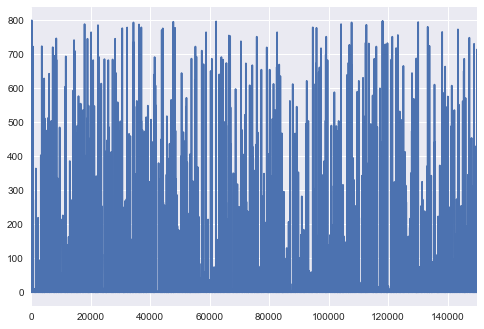

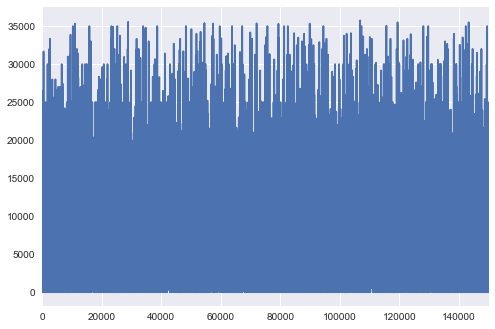

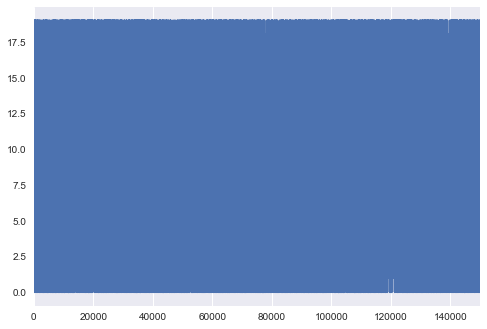

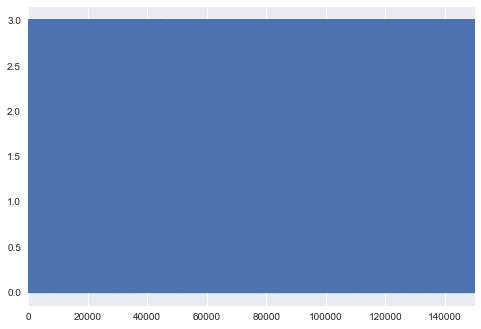

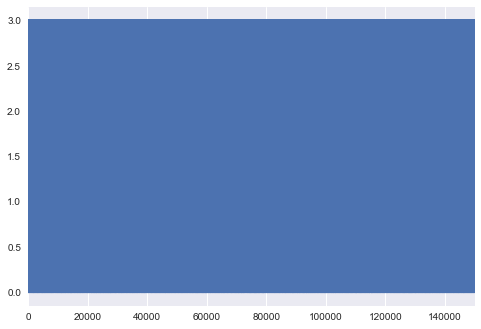

In [11]:
for i in col:
    df[i].plot()
    plt.show()

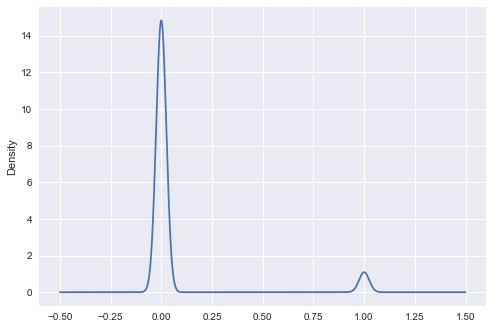

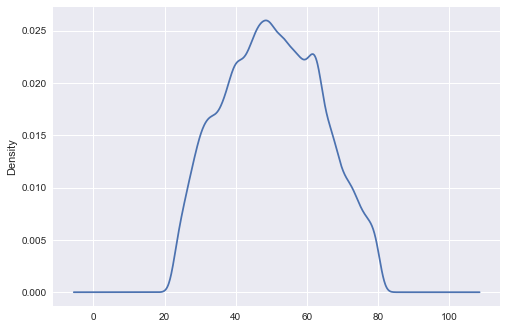

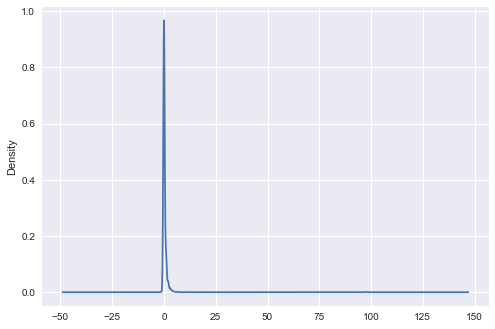

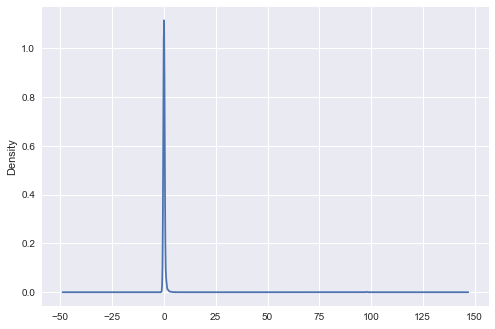

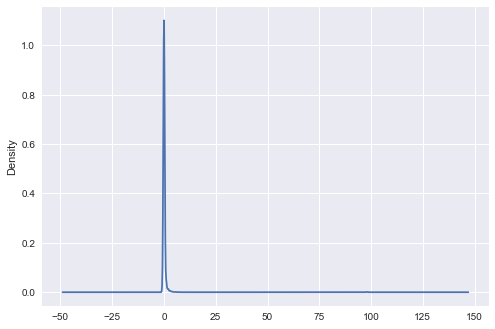

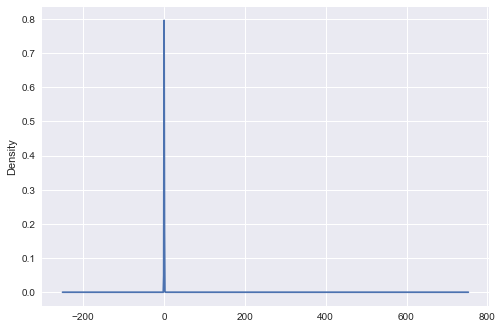

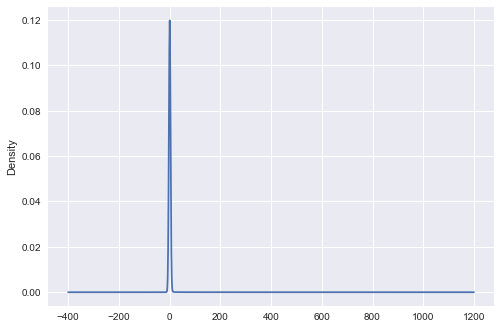

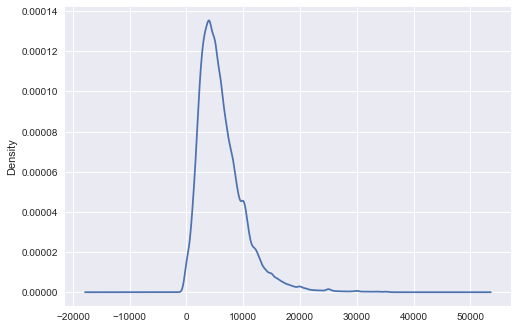

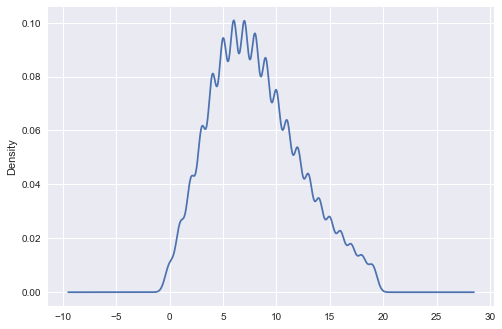

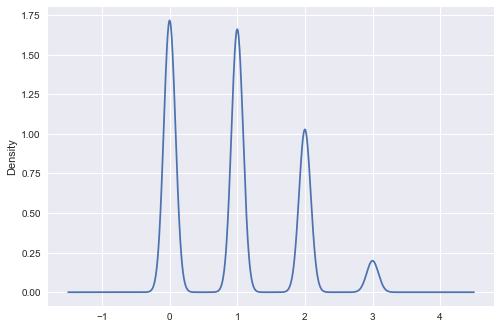

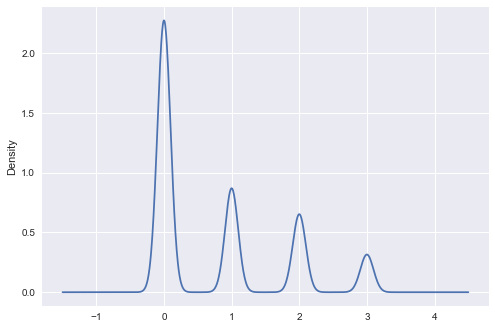

In [12]:
for i in list(df.columns):
    df[i].plot.density()
    plt.show()

In [ ]:
df.columns

In [14]:
for i in list(df.columns):
    print('\n', i)
    print('skewness', df[i].skew())
    print(df[i].describe())


 output
skewness 3.40957001934
count    104913.000000
mean          0.068724
std           0.252985
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: output, dtype: float64

 age
skewness 0.0687389849986
count    104913.000000
mean         50.412151
std          13.661594
min          23.000000
25%          40.000000
50%          50.000000
75%          61.000000
max          80.000000
Name: age, dtype: float64

 1monplus_dlqin_freq
skewness 27.1290915022
count    104913.000000
mean          0.374205
std           3.443552
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: 1monplus_dlqin_freq, dtype: float64

 2monplus_dlqin_freq
skewness 28.5023873074
count    104913.000000
mean          0.184972
std           3.392818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: 2monplus

In [15]:
high_skew_col = ['1monplus_dlqin_freq', 'credit_balance_ratio', 'debt_ratio']

In [16]:
for i in high_skew_col:
    m = df[i].describe()['mean']
    std = df[i].describe()['std']
    l, u = limits(m, std)
    df = df[(df[i] > l) &  (df[i] < u)]

In [17]:
len(df[(df['output'] == 1)])

7095

In [18]:
for i in list(df.columns):
    print('\n', i)
    print('skewness', df[i].skew())
    print(df[i].describe())


 output
skewness 3.42796887034
count    104137.000000
mean          0.068131
std           0.251972
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: output, dtype: float64

 age
skewness 0.0682179598266
count    104137.000000
mean         50.452001
std          13.639415
min          23.000000
25%          40.000000
50%          50.000000
75%          61.000000
max          80.000000
Name: age, dtype: float64

 1monplus_dlqin_freq
skewness 3.80306692099
count    104137.00000
mean          0.25574
std           0.69560
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           7.00000
Name: 1monplus_dlqin_freq, dtype: float64

 2monplus_dlqin_freq
skewness 7.04016470123
count    104137.000000
mean          0.067901
std           0.332817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: 2monplus_dlqin_f

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
df['expense'] = df['debt_ratio']*df['income']
df.head()

In [ ]:
df['age'].describe()

In [ ]:
m = df['age'].describe()['mean']
std = df['age'].describe()['std']
l = m-2*std
u = m+2*std
df = df[(df['age'] > l) &  (df['age'] < u)]

In [ ]:
len(df)

In [ ]:
df = df[(df['income'] > l) &  (df['income'] < u)]

In [ ]:
len(df)

In [ ]:
df['income'].plot()
plt.show()

In [ ]:
df['income'].describe()

In [ ]:
X=df.iloc[:, 1:].values

In [ ]:
df.shape
from sklearn.decomposition import FactorAnalysis
#factor = FactorAnalysis(n_components=4, random_state=101).fit(X)

In [ ]:
#print(pd.DataFrame(factor.components_,columns=list(X)))

There is a linear relationship between these time span variables as confirmed here but it looks like we have outliers 

In [ ]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

In [ ]:
df['costs']=df['debt_ratio']*df['income']


In [ ]:
med=df['1monplus_dlqin_freq'].median()
med

In [ ]:
df.loc[df['1monplus_dlqin_freq']>50,'1monplus_dlqin_freq']=med
df.loc[df['2monplus_dlqin_freq']>50,'2monplus_dlqin_freq']=med
df.loc[df['3monplus_dlqin_freq']>50,'3monplus_dlqin_freq']=med

In [ ]:
df = df.drop('income', axis=1)

In [ ]:
sum(df['1monplus_dlqin_freq']>50)

In [ ]:
#df=df.take(np.random.permutation(len(df))[:20000])
X_sample=df.iloc[:, 1:].values
#plot(X_sample[:,2])
#plt.show()

In [ ]:
predictors=df.iloc[:, 1:]

In [ ]:
percentile_based_outlier(X_sample[:,2])

In [ ]:
y = df.iloc[:, 0].values
y

In [ ]:
df.columns

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y, test_size = 0.25, random_state = 0)

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
importance = classifier.feature_importances_
importance = pd.DataFrame(importance, index=predictors.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in classifier.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

In [ ]:
predictors.head()

credit bal, debt_ratio and costs are the most important variables

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
(cm[0][0]+cm[0][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

RF with 500 trees gives a poor performance. Lets now try another ensemble model adaboost.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
bdt.fit(X_train, y_train)

In [ ]:
y_pred=bdt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

Lets see how a single linear model SVC performs

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)